In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Create Classification Dataset**

In [229]:
from sklearn.datasets import make_classification

This library will generate a random classification dataset.
No need to do standardization of this dataset.

In [230]:
# create dataset
X,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)

In [231]:
df=pd.DataFrame(X)

In [232]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470


In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.3,random_state=42)

In [235]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 541 to 102
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       700 non-null    float64
 1   1       700 non-null    float64
 2   2       700 non-null    float64
 3   3       700 non-null    float64
 4   4       700 non-null    float64
 5   5       700 non-null    float64
 6   6       700 non-null    float64
 7   7       700 non-null    float64
 8   8       700 non-null    float64
 9   9       700 non-null    float64
dtypes: float64(10)
memory usage: 60.2 KB


In [236]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [237]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [238]:
y_pred = logistic.predict(X_test)

In [239]:
probabilities = logistic.predict_proba(X_test)

In [240]:
print(probabilities[0])
print(y_pred[0])

[0.77447791 0.22552209]
0


Performance Metrices

In [241]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [242]:
acc_score = accuracy_score(y_true=y_test,y_pred=y_pred)
acc_score

0.8466666666666667

In [243]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
cm

array([[118,  17],
       [ 29, 136]])

In [244]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [245]:
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



**Hyperparameter Tuning**

In [246]:
## We can play with Logistic Regression parameters
hyper_para_model = LogisticRegression()

Let's define all parameters and then convert all of them to a dictionary

In [247]:
penalty = ["l1", "l2", "elasticnet"]
C_values = [1.0,100,200,0.1,0.01] # C value is inversely proportional to Lambda value in penalty
solver = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

In [248]:
# dict(key=values)
params = dict(penalty=penalty,C=C_values,solver=solver)
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [1.0, 100, 200, 0.1, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

Cross-Validation

In [249]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

## GridSearchCV

In [250]:
from sklearn.model_selection import GridSearchCV

In [251]:
grid = GridSearchCV(estimator=hyper_para_model,cv=cv,n_jobs=-1,param_grid=params,scoring='accuracy')
# grid = GridSearchCV(estimator=Model
# ,cv=Cross Validation
# ,n_jobs=-1 (Use all available CPU)
# ,param_grid=params (Defined Hyper parameters)
# ,scoring='accuracy')

In [252]:
print(grid)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 100, 200, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')


We can see all the parameters on which model has been trained

In [253]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 100, 200, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [254]:
grid.best_estimator_

LogisticRegression(C=0.01)

In [255]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

In [256]:
y_pred_gridsearch = grid.predict(X_test)

In [257]:
cr = classification_report(y_test,y_pred_gridsearch)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



In [258]:
acc_score = accuracy_score(y_true=y_test,y_pred=y_pred_gridsearch)
acc_score

0.8533333333333334

We can see accuracy has increased a bit.

## RandomizedSearchCV

In [259]:
from sklearn.model_selection import RandomizedSearchCV

In [260]:
random_grid = RandomizedSearchCV(estimator=hyper_para_model,
                          param_distributions=params,
                          cv=5,
                          n_jobs=-1,
                          scoring="accuracy")

In [261]:
print(random_grid)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1.0, 100, 200, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')


In [262]:
random_grid.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1203, in fit
    raise ValueError("l1_ra

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1.0, 100, 200, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [263]:
random_grid.best_params_

{'solver': 'newton-cholesky', 'penalty': 'l2', 'C': 0.01}

## Multiclass Logistic Regression

In [264]:
# Let's create dataset
from sklearn.datasets import make_classification

In [265]:
X,y = make_classification(n_classes=3,n_features=10,n_samples=1000,n_informative=4)

In [266]:
df=pd.DataFrame(X)

In [267]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='ovr')

In [268]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [269]:
lr_model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [270]:
y_pred = lr_model.predict(X_test)

In [271]:
acc = accuracy_score(y_test,y_pred)
acc

0.61

## Logistic regression for imbalanced Dataset

In [272]:
from collections import Counter
from sklearn.datasets import make_classification

In [273]:
# To create imbalanced dataset we assign weights
## Weights = 0.99 means 99% dataset to be of one class and 1 percent of other class
X_imb,y_imb = make_classification(n_samples=1000,
                          n_features=2,
                                  n_clusters_per_class=1,
                          n_redundant=0,
                          weights=[0.99],
                                  random_state=42)

In [274]:
Counter(y_imb)

Counter({np.int64(0): 985, np.int64(1): 15})

We can see 985 times 0 and 15 times 1

In [275]:
df_imb = pd.DataFrame(X_imb)

<Axes: xlabel='0', ylabel='1'>

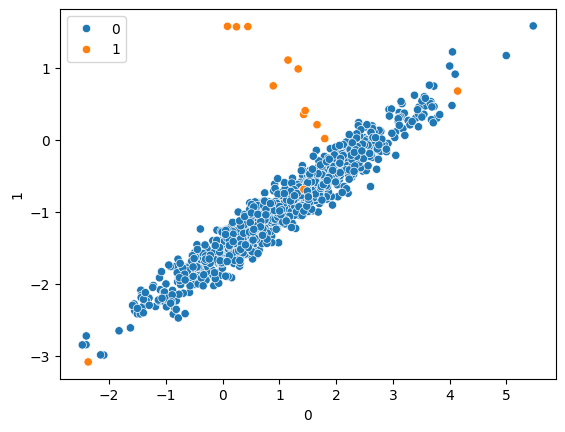

In [276]:
sns.scatterplot(x=df_imb[0],y=df_imb[1],hue=y_imb)

In [277]:
class_weights = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [278]:
class_weights

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

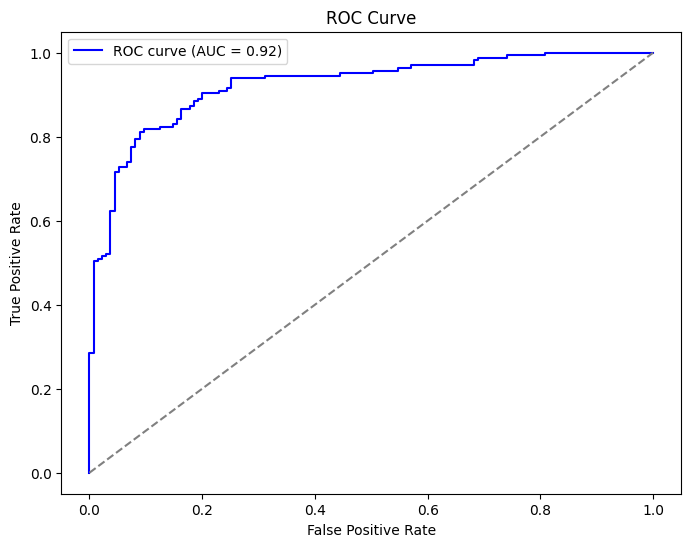

In [279]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Step 1: Create a toy dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Step 2: Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Step 5: Compute ROC curve values
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Step 6: Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
